<a href="https://colab.research.google.com/github/Cutie-tee/nlp_project/blob/main/nlp_textclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the Data

In [ ]:
import pandas as pd
#Load the dataset
data =pd.read_csv('/content/training_data_lowercase.csv')
# column names
column_names = data.columns.tolist()
print("Column names:", column_names)
data.head()

Column names: ['0\tdonald trump sends out embarrassing new year‚s eve message; this is disturbing']


,0\tdonald trump sends out embarrassing new year‚s eve message; this is disturbing
0,0\tdrunk bragging trump staffer started russia...
1,0\tsheriff david clarke becomes an internet jo...
2,0\ttrump is so obsessed he even has obama‚s na...
3,0\tpope francis just called out donald trump d...
4,0\tracist alabama cops brutalize black boy whi...


In [ ]:
# Reload the CSV with tab delimiter
data = pd.read_csv('/content/training_data_lowercase.csv', delimiter='\t')


# Rename the columns for clarity
data.columns = ['label', 'text']
# Display the first few rows to confirm
data.head()


,label,text
0,0,drunk bragging trump staffer started russian c...
1,0,sheriff david clarke becomes an internet joke ...
2,0,trump is so obsessed he even has obama‚s name ...
3,0,pope francis just called out donald trump duri...
4,0,racist alabama cops brutalize black boy while ...


Data Preprocessing ( Cleaning& Tokenisation)

In [ ]:
#Clean the text to convert to lowercase, remove punctuation, whitespace , stop words, toeksnising andlemmatising

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Define stop words and preprocessing function
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize and remove stopwords
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

data['label'] = data['label'].astype(int)

# Apply preprocessing to the 'text' column
data['cleaned_text'] = data['text'].apply(preprocess_text)
data.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,label,text,cleaned_text
0,0,drunk bragging trump staffer started russian c...,drunk bragging trump staffer started russian c...
1,0,sheriff david clarke becomes an internet joke ...,sheriff david clarke becomes internet joke thr...
2,0,trump is so obsessed he even has obama‚s name ...,trump obsessed even obama‚s name coded website...
3,0,pope francis just called out donald trump duri...,pope francis called donald trump christmas speech
4,0,racist alabama cops brutalize black boy while ...,racist alabama cops brutalize black boy handcu...


 Vectorize Text Data with TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(data['cleaned_text'])
y = data['label']
print('X', y)


X 0        0
1        0
2        0
3        0
4        0
        ..
34146    1
34147    1
34148    1
34149    1
34150    1
Name: label, Length: 34151, dtype: int64


Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (27320, 5000)
X_test shape: (6831, 5000)


Model Training with Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train classifier
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9313424096032792
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3515
           1       0.92      0.94      0.93      3316

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831



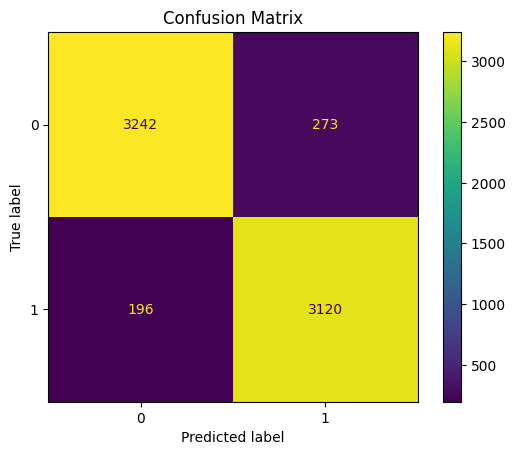

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import the matplotlib library

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


Cross validation with SVM  


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import numpy as np

# Extract text and labels
texts = data['text']
labels = data['label']

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
y = labels



Cross-Validation Scores for each fold: [0.90469917 0.92093704 0.9033675  0.94304539 0.93704246]
Average Cross-Validation Score: 0.9218183104197492


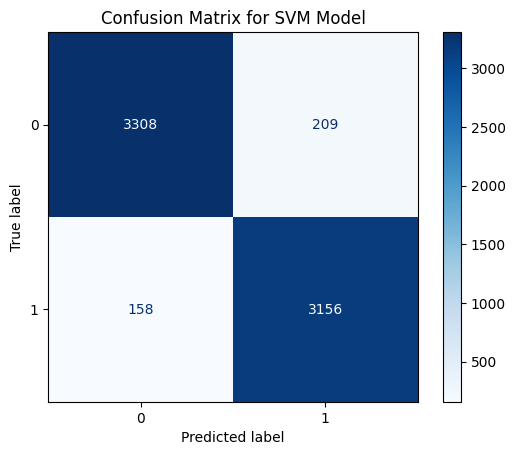

Accuracy: 0.9503732981993852
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3517
           1       0.94      0.96      0.95      3314

    accuracy                           0.95      6831
   macro avg       0.95      0.95      0.95      6831
weighted avg       0.95      0.95      0.95      6831



In [ ]:

# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X, y, cv=5)

# Print the accuracy for each fold and the mean accuracy
print("Cross-Validation Scores for each fold:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data

# Fit the model and predict on the test set
svm_model.fit(X_train, y_train) # Fit the model
y_pred_svm = svm_model.predict(X_test) # Predict on the test set

# Generate confusion matrix for SVM model
cm_svm = confusion_matrix(y_test, y_pred_svm) # Calculate confusion matrix

# Plot the confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM Model')
plt.show()

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# classification report
print(classification_report(y_test, y_pred))



Hyperparameter tuning

Logistic Regression Tuning

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.9462298682284042


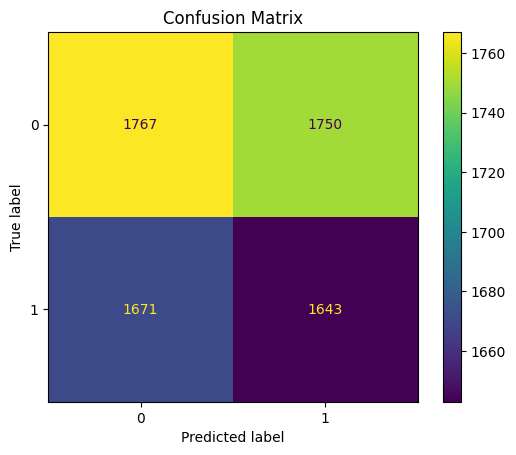

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()



SVM Tuning

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.9482430453879941


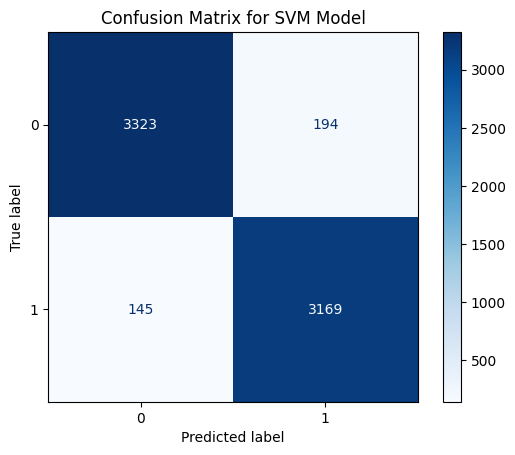

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_svm.best_params_)
print("Best cross-validation accuracy:", grid_svm.best_score_)

# Get predictions on the test set using the best estimator found by GridSearchCV
y_pred = grid_svm.predict(X_test)

# Generate the confusion matrix using the predictions and true labels
cm_svm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm) # Pass the confusion matrix to ConfusionMatrixDisplay
disp_svm.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM Model')
plt.show()

**Model Deployment using Gradio**

In [39]:
#To save the model

import joblib
joblib.dump(model, "fake_news_model.pkl")  # Save the model
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")  # Save the TF-IDF vectorizer



['tfidf_vectorizer.pkl']

Setting up the environment

In [40]:
pip install gradio


Loadning the Model & Vectoriser

In [41]:
import joblib

# Load the saved model and vectorizer
model = joblib.load("fake_news_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")


Defifing the Prediction Function

In [42]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase and remove punctuation
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    # Tokenize and remove stopwords
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

def predict_fake_news(text):
    # Preprocess the input text
    cleaned_text = preprocess_text(text)
    # Transform the text using the TF-IDF vectorizer
    text_vector = vectorizer.transform([cleaned_text])
    # Predict with the model
    prediction = model.predict(text_vector)
    # Map the output to a label
    return "Fake News" if prediction[0] == 0 else "Real News"


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Setting up the Gradio Interface

In [43]:
import gradio as gr

# Define Gradio interface
gr_interface = gr.Interface(
    fn=predict_fake_news,  # The prediction function
    inputs="text",  # Input type for user input (news text)
    outputs="label",  # Output type for prediction
    title="Fake News Detection",
    description="Enter a news article text to check if it is fake or real."
)


Launch the App

In [44]:
# Launch the Gradio app
gr_interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://64aa1c0e5408350821.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [45]:
#To run the app
!python fake_news_app.py

python3: can't open file '/content/fake_news_app.py': [Errno 2] No such file or directory
